---
# K-Means from Scratch

#### Reference Material
Source code referenced from here: https://mubaris.com/posts/kmeans-clustering/

#### TL; DR
To understand the underlying process and code structure for a K-Means Algo from scratch

### K-Means Procedure

1. Randomly initialize the k centroids
2. Find the distances between each data point and each centroid
3. Assign cluster to each data point
4. Update centroid by finding the cluster means
5. Iterate steps 2-4 until distance between old and new centroid is minimized


In [154]:
import numpy as np
import pandas as pd

import os
cwd = os.getcwd()

from copy import deepcopy

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# %config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2
plt.style.use('seaborn')
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'w'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the toy datasets

In [155]:
def load_data(name):
    return np.loadtxt(name)

In [156]:
path_duruData = os.path.join(cwd, "data/durudataset.txt")
data_duruData = load_data(path_duruData)
print(data_duruData.shape)

(40, 2)


In [157]:
path_xclara = os.path.join(cwd, "data/xclara.csv")
data_xclara = pd.read_csv(path_xclara)
print(data_xclara.shape)

(3000, 2)


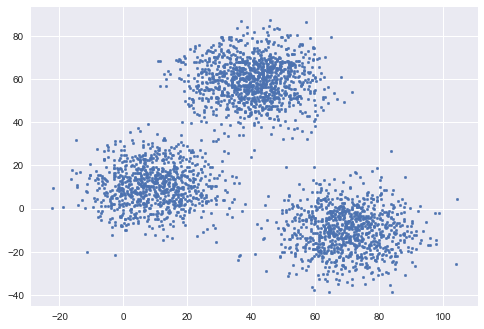

In [158]:
plt.scatter(data_xclara.V1, data_xclara.V2, s=7)
plt.show()

### Euclidean Distance

2-Dimensional Space:

$$D(x,y)=\sqrt{(x_{1}-y_{1})^2+(x_{i}-y_{j})^2}$$

n-Dimensional Space:

$$D(p,q)=\sqrt{(q_{1}-p_{1})^2+...+(q_{n}-p_{n})^2}$$

In [159]:
def euclidean_distance(x, y, ax=1):
    return np.linalg.norm(x - y, axis=ax)

In [160]:
X = np.array(list(zip(data_xclara.V1.values, data_xclara.V2.values)))

### Randomly the k Initialize the Centroids 

In [190]:
k = 4

# centroid x coordinate
c_x = np.random.randint(0, np.max(X)-20, size=k)

# centroid y coordinate
c_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(c_x, c_y)), dtype=np.float32)
print(C)

[[61. 76.]
 [ 9. 74.]
 [82. 46.]
 [39. 57.]]


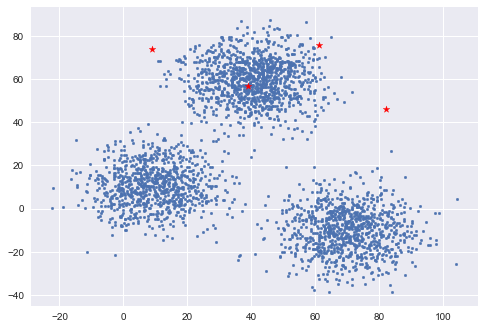

In [191]:
plt.scatter(X.T[0], X.T[1], s=7)
plt.scatter(c_x, c_y, marker='*', c='r')
plt.show()

### Cluster Assignment & Centroid Alignment Iteration 

In [194]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = euclidean_distance(C, C_old, None)
# Loop will run till the error becomes zero
epsilon = 1e-08
iteration = 0
while error != 0:
    iteration += 1
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = euclidean_distance(C, C_old, None)
    print(iteration)

/Users/marktblack/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:2257: RuntimeWarning: invalid value encountered in sqrt
  ret = sqrt(sqnorm)


1
2
3
4
5
6
7


## Plotting the Clusters & Centroids

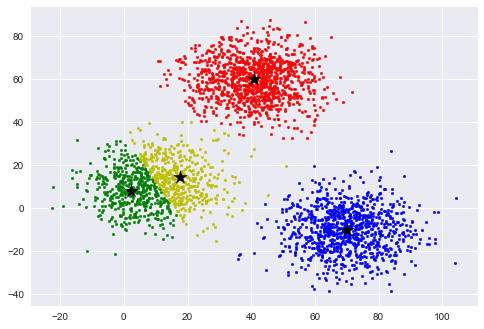

In [195]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.show()